<a href="https://colab.research.google.com/github/msuman-07/ML-Projects/blob/main/Salary_Estimation_KNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np

In [2]:
from google.colab import files
uploaded = files.upload()

Saving salary_dataset.csv to salary_dataset.csv


In [4]:
dataset = pd.read_csv('salary_dataset.csv')

In [6]:
print(dataset.shape)
print(dataset.head(10)) ##Head - First value in Dataset , Tail - Last value

(700, 5)
   age  education.num  capital.gain  hours.per.week income
0   69             14             0              71   >50K
1   32             11             0              35  <=50K
2   89              8             0              75   >50K
3   78              3             0              49  <=50K
4   38              7             0              26   >50K
5   41              3             0              10   >50K
6   20             15             0              70   >50K
7   39              7             0              52   >50K
8   70             14             0              51  <=50K
9   19             11             0              34   >50K


## Mapping salary data to Binary value

In [7]:
income_set = set(dataset['income'])
dataset['income'] = dataset['income'].map({'<=50K': 0, '>50K': 1}).astype(int)
print(dataset.head)

<bound method NDFrame.head of      age  education.num  capital.gain  hours.per.week  income
0     69             14             0              71       1
1     32             11             0              35       0
2     89              8             0              75       1
3     78              3             0              49       0
4     38              7             0              26       1
..   ...            ...           ...             ...     ...
695   73              3             0              58       1
696   31              3             0              69       1
697   45              4             0              11       0
698   19             11             0              69       0
699   43              1             0              14       0

[700 rows x 5 columns]>


In [9]:
X = dataset.iloc[:, :-1].values
X

array([[69, 14,  0, 71],
       [32, 11,  0, 35],
       [89,  8,  0, 75],
       ...,
       [45,  4,  0, 11],
       [19, 11,  0, 69],
       [43,  1,  0, 14]])

In [13]:
Y = dataset.iloc[:, -1].values
Y

array([1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0,
       0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0,
       0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1,
       0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0,
       0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0,
       1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1,
       0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0,
       0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1,
       1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0,
       0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1,
       1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0,
       0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0,

## Import Library

In [15]:
!pip install scikit-learn

# Test and Train Split for Dataset

In [11]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.25, random_state = 0)

# Feature Scaling


we scale our data to make all the features contribute equally to the result

Fit_Transform - fit method is calculating the mean and variance of each of the features present in our data

Transform - Transform method is transforming all the features using the respective mean and variance, We want our test data to be a completely new and a surprise set for our model

In [17]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

# Finding the best K value

Text(0, 0.5, 'Mean Error')

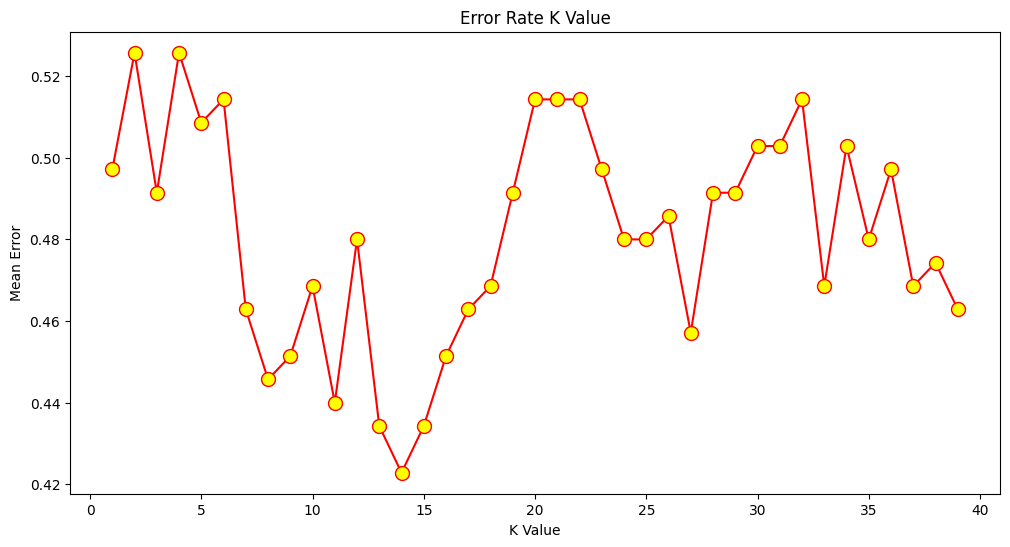

In [25]:
error = []
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt

# Calculating error for K values between 1 and 40
for i in range(1, 40):
  model = KNeighborsClassifier (n_neighbors=i)
  model.fit(X_train, y_train)
  pred_i = model.predict(X_test)
  error.append(np.mean (pred_i != y_test))

plt.figure(figsize=(12, 6))
plt.plot(range(1, 40), error, color='red', linestyle= 'solid', marker='o', markerfacecolor='yellow', markersize=10)
plt.title('Error Rate K Value')
plt.xlabel('K Value')
plt.ylabel('Mean Error')

# Training

In [26]:
from sklearn.neighbors import KNeighborsClassifier
model = KNeighborsClassifier(n_neighbors = 2, metric = 'minkowski', p = 2)
model.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=2)

# Predicting whether new customer with age & Salary will Buy or Not

In [39]:
age = int(input("Enter New Employee's Age: "))
edu = int(input("Enter New Employee's Education: "))
cg = int(input("Enter New Employee's Captital Gain: "))
wh = int(input("Enter New Employee's Hour's Per week: "))

newEmp = [[age, edu, cg, wh]]
result = model.predict(sc.transform(newEmp))
print(result)

if result == 1:
  print("Employee might got Salary above 50K")
else:
  print("Customer might not got Salary above 50K")

Enter New Employee's Age: 54
Enter New Employee's Education: 45
Enter New Employee's Captital Gain: 64
Enter New Employee's Hour's Per week: 35
[0]
Customer might not got Salary above 50K


# Prediction for all Test Data

In [36]:
y_pred = model.predict(X_test)
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))

[[0 0]
 [0 0]
 [0 1]
 [0 0]
 [0 1]
 [0 1]
 [0 0]
 [1 1]
 [0 1]
 [0 0]
 [0 1]
 [1 1]
 [0 0]
 [0 1]
 [0 1]
 [1 0]
 [1 0]
 [1 0]
 [0 0]
 [1 1]
 [0 0]
 [0 1]
 [0 1]
 [1 0]
 [0 1]
 [0 0]
 [1 1]
 [1 0]
 [0 0]
 [0 0]
 [0 1]
 [0 1]
 [0 0]
 [1 0]
 [0 1]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [0 1]
 [0 1]
 [0 1]
 [0 1]
 [1 0]
 [0 0]
 [0 0]
 [0 0]
 [0 1]
 [0 0]
 [0 1]
 [0 1]
 [0 1]
 [0 0]
 [1 0]
 [0 1]
 [0 1]
 [1 0]
 [1 0]
 [0 0]
 [0 1]
 [0 0]
 [1 1]
 [0 1]
 [0 1]
 [0 1]
 [0 0]
 [0 0]
 [0 1]
 [0 1]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [1 0]
 [0 0]
 [1 1]
 [1 1]
 [0 1]
 [0 1]
 [0 1]
 [1 0]
 [0 1]
 [1 0]
 [0 1]
 [1 0]
 [0 1]
 [1 0]
 [0 0]
 [0 0]
 [0 1]
 [0 0]
 [0 1]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [0 1]
 [1 1]
 [0 1]
 [0 1]
 [1 1]
 [0 1]
 [0 1]
 [1 0]
 [0 1]
 [1 1]
 [1 0]
 [0 1]
 [0 0]
 [1 1]
 [0 1]
 [1 0]
 [0 0]
 [0 1]
 [0 1]
 [0 0]
 [1 1]
 [0 1]
 [0 1]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [1 0]
 [1 0]
 [0 1]
 [1 0]
 [0 1]
 [1 1]
 [0 0]
 [0 1]
 [1 1]
 [0 1]
 [0 0]
 [0 0]
 [0 1]
 [1 1]
 [0 0]
 [0 1]
 [0 0]
 [0 1]

# Evaluating Model - Confusion Matrix

In [37]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)

print("confusion Matrix: ")
print(cm)

print("Accuracy of the Model: {0}%".format(accuracy_score (y_test, y_pred) *100))

confusion Matrix: 
[[57 24]
 [68 26]]
Accuracy of the Model: 47.42857142857143%
